In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
# DOWNLOADING THE PACKAGES:
!pip install pystan

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 91.8/91.8 kB 3.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.4/44.4 MB 30.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 93.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.4/49.4 kB 6.7 MB/s eta 0:00:00


In [3]:
import prophet

In [4]:
dir(prophet)  #seeing the functionalities

['Path',
 'Prophet',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 '__version__',
 'about',
 'diagnostics',
 'f',
 'forecaster',
 'here',
 'make_holidays',
 'models',
 'plot']

In [5]:
# IMPORTING RELEVANT LIBRARIES:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [6]:
df = pd.read_csv("/HDFCBANK.NS.csv")
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-10-03,1015.224976,1026.099976,1003.500000,1015.575012,979.958130,7666074
1,2018-10-04,1004.000000,1008.900024,971.500000,978.875000,944.545166,8985292
2,2018-10-05,976.974976,995.000000,970.075012,982.650024,948.187744,7864590
3,2018-10-08,982.500000,984.500000,965.000000,972.500000,938.393738,10064010
4,2018-10-09,972.200012,982.500000,965.000000,970.299988,936.270813,6229682


In [7]:
df.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
1230,2023-09-25,1525.000000,1540.699951,1525.000000,1531.000000,1531.000000,20104377
1231,2023-09-26,1525.000000,1540.000000,1525.000000,1537.650024,1537.650024,13787654
1232,2023-09-27,1523.000000,1532.500000,1515.000000,1526.849976,1526.849976,19669269
1233,2023-09-28,1534.000000,1537.599976,1518.349976,1523.699951,1523.699951,27677094
1234,2023-09-29,1523.699951,1535.449951,1522.300049,1526.300049,1526.300049,16026891


In [8]:
df.shape

(1235, 7)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1235 entries, 0 to 1234
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       1235 non-null   object 
 1   Open       1235 non-null   float64
 2   High       1235 non-null   float64
 3   Low        1235 non-null   float64
 4   Close      1235 non-null   float64
 5   Adj Close  1235 non-null   float64
 6   Volume     1235 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 67.7+ KB


In [10]:
#CHANGING TO DATETIME DATATYPE:
df['Date'] = pd.to_datetime(df['Date'])

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1235 entries, 0 to 1234
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       1235 non-null   datetime64[ns]
 1   Open       1235 non-null   float64       
 2   High       1235 non-null   float64       
 3   Low        1235 non-null   float64       
 4   Close      1235 non-null   float64       
 5   Adj Close  1235 non-null   float64       
 6   Volume     1235 non-null   int64         
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 67.7 KB


In [12]:
#CHECKING FIRST DATE:
df['Date'].min()

Timestamp('2018-10-03 00:00:00')

In [13]:
# CHECKING LAST DATE:
df['Date'].max()

Timestamp('2023-09-29 00:00:00')

In [14]:
df.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

In [15]:
# SINCE WE'RE USING FACEBOOK PROPHET, WE'LL BE ABLE TO PREDICT ONLY ONE VARIABLE AT A TIME.
dataset = df[['Date', 'Close']]
dataset.head()

,Date,Close
0,2018-10-03,1015.575012
1,2018-10-04,978.875000
2,2018-10-05,982.650024
3,2018-10-08,972.500000
4,2018-10-09,970.299988


In [16]:
dataset['Date'].nunique()

1235

In [17]:
len(dataset)

1235

In [18]:
# ASSIGNING NOMENCLATURE:
df_prophet = dataset.rename(columns={'Date':'ds', 'Close':'y'})
df_prophet

,ds,y
0,2018-10-03,1015.575012
1,2018-10-04,978.875000
2,2018-10-05,982.650024
3,2018-10-08,972.500000
4,2018-10-09,970.299988
...,...,...
1230,2023-09-25,1531.000000
1231,2023-09-26,1537.650024
1232,2023-09-27,1526.849976
1233,2023-09-28,1523.699951


In [19]:
from prophet import Prophet

m = Prophet()
model=m.fit(df_prophet)  # AUTOMATICALLY IDENTIFIES TARGET AND FEATURES

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpo7s90svw/hf6el1lk.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpo7s90svw/9fxrqo5d.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=32866', 'data', 'file=/tmp/tmpo7s90svw/hf6el1lk.json', 'init=/tmp/tmpo7s90svw/9fxrqo5d.json', 'output', 'file=/tmp/tmpo7s90svw/prophet_model9dg2cc7x/prophet_model-20231103130358.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
13:03:58 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
13:03:58 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [20]:
model.seasonalities

OrderedDict([('yearly',
              {'period': 365.25,
               'fourier_order': 10,
               'prior_scale': 10.0,
               'mode': 'additive',
               'condition_name': None}),
             ('weekly',
              {'period': 7,
               'fourier_order': 3,
               'prior_scale': 10.0,
               'mode': 'additive',
               'condition_name': None})])

In [21]:
# PREDICTING NEXT 6 MONTHS(WITHOUT TAKING SATURDAYS, SUNDAYS AND HOLIDAYS.)
future_data=model.make_future_dataframe(periods=180, freq='D')
future_data

,ds
0,2018-10-03
1,2018-10-04
2,2018-10-05
3,2018-10-08
4,2018-10-09
...,...
1410,2024-03-23
1411,2024-03-24
1412,2024-03-25
1413,2024-03-26


In [22]:
df_prophet.shape

(1235, 2)

In [23]:
future_data.shape

(1415, 1)

In [24]:
prediction = model.predict(future_data)
prediction

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2018-10-03,923.938899,821.100559,957.025356,923.938899,923.938899,-31.749328,-31.749328,-31.749328,-3.090437,-3.090437,-3.090437,-28.658890,-28.658890,-28.658890,0.0,0.0,0.0,892.189571
1,2018-10-04,924.963469,821.863923,966.317305,924.963469,924.963469,-30.933107,-30.933107,-30.933107,-5.942848,-5.942848,-5.942848,-24.990259,-24.990259,-24.990259,0.0,0.0,0.0,894.030362
2,2018-10-05,925.988039,827.021336,966.656555,925.988039,925.988039,-28.142977,-28.142977,-28.142977,-6.897264,-6.897264,-6.897264,-21.245713,-21.245713,-21.245713,0.0,0.0,0.0,897.845062
3,2018-10-08,929.061750,846.860284,979.323777,929.061750,929.061750,-16.803721,-16.803721,-16.803721,-6.845735,-6.845735,-6.845735,-9.957985,-9.957985,-9.957985,0.0,0.0,0.0,912.258030
4,2018-10-09,930.086320,853.487506,993.858513,930.086320,930.086320,-9.987872,-9.987872,-9.987872,-3.675919,-3.675919,-3.675919,-6.311953,-6.311953,-6.311953,0.0,0.0,0.0,920.098448
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1410,2024-03-23,1829.368871,1715.329214,1974.090066,1723.251995,1943.485440,10.434495,10.434495,10.434495,33.383336,33.383336,33.383336,-22.948841,-22.948841,-22.948841,0.0,0.0,0.0,1839.803366
1411,2024-03-24,1829.977269,1672.936105,1927.178059,1723.393229,1945.062980,-29.839991,-29.839991,-29.839991,-6.931132,-6.931132,-6.931132,-22.908859,-22.908859,-22.908859,0.0,0.0,0.0,1800.137278
1412,2024-03-25,1830.585667,1676.680360,1933.881959,1723.506623,1946.613143,-29.559927,-29.559927,-29.559927,-6.845735,-6.845735,-6.845735,-22.714192,-22.714192,-22.714192,0.0,0.0,0.0,1801.025739
1413,2024-03-26,1831.194064,1678.548597,1947.551456,1723.029800,1949.066684,-26.057303,-26.057303,-26.057303,-3.675919,-3.675919,-3.675919,-22.381384,-22.381384,-22.381384,0.0,0.0,0.0,1805.136762


In [25]:
prediction.columns

Index(['ds', 'trend', 'yhat_lower', 'yhat_upper', 'trend_lower', 'trend_upper',
       'additive_terms', 'additive_terms_lower', 'additive_terms_upper',
       'weekly', 'weekly_lower', 'weekly_upper', 'yearly', 'yearly_lower',
       'yearly_upper', 'multiplicative_terms', 'multiplicative_terms_lower',
       'multiplicative_terms_upper', 'yhat'],
      dtype='object')

In [26]:
prediction[['ds', 'yhat_lower', 'yhat_upper', 'yhat']].tail(10)  #YHAT IS THE PREDICTION

,ds,yhat_lower,yhat_upper,yhat
1405,2024-03-18,1677.759076,1922.108901,1799.178219
1406,2024-03-19,1679.457684,1921.662645,1802.002450
1407,2024-03-20,1671.008609,1935.213452,1802.467267
1408,2024-03-21,1672.448159,1930.732978,1799.707185
1409,2024-03-22,1668.439116,1927.344737,1799.044942
1410,2024-03-23,1715.329214,1974.090066,1839.803366
1411,2024-03-24,1672.936105,1927.178059,1800.137278
1412,2024-03-25,1676.680360,1933.881959,1801.025739
1413,2024-03-26,1678.548597,1947.551456,1805.136762
1414,2024-03-27,1682.226467,1944.674771,1806.784459


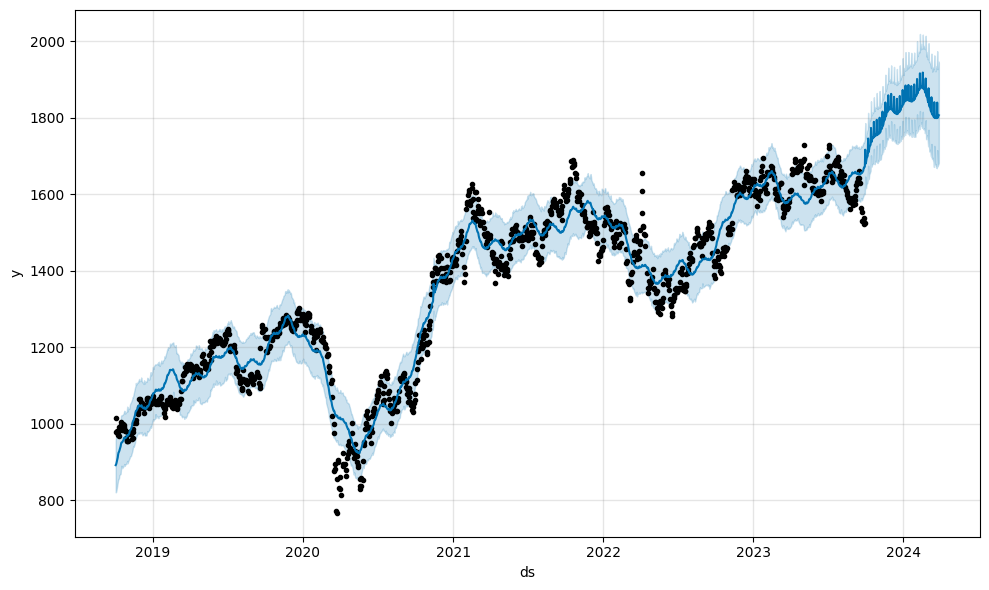

In [27]:
model.plot(prediction)
plt.show()

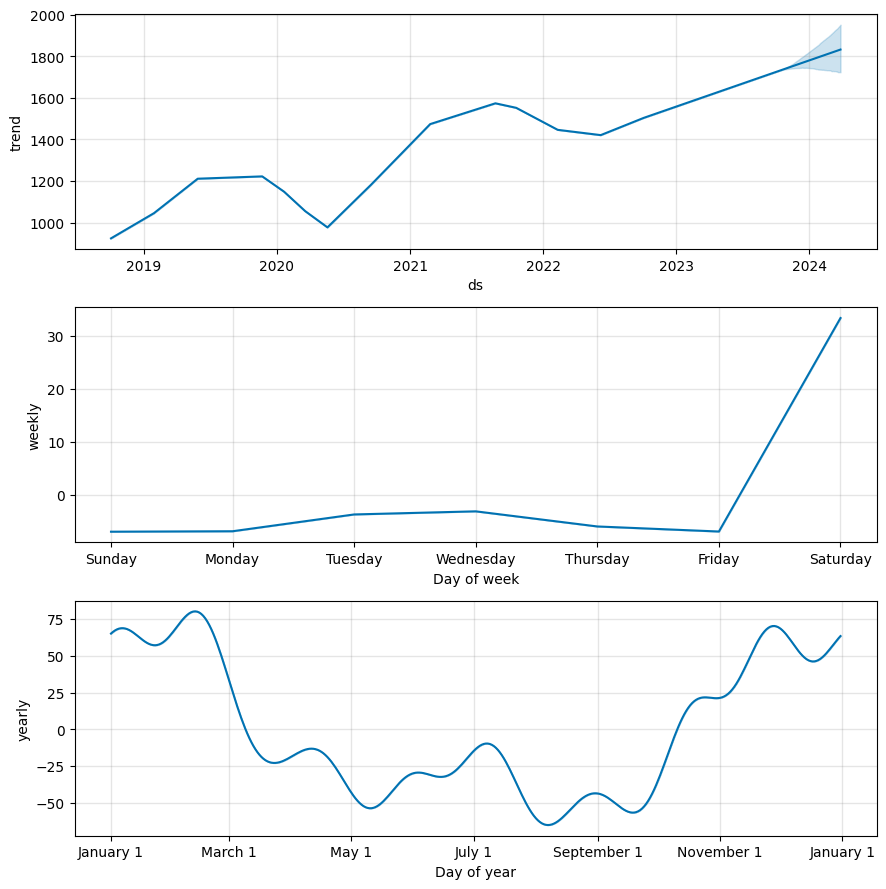

In [28]:
## CHECKING COMPONENTS:
model.plot_components(prediction)
plt.show()

In [30]:
# Cross Validation:
from prophet.diagnostics import cross_validation

df_cv = cross_validation(model, horizon='30 days', period = '15 days', initial ='90 days')

from prophet.diagnostics import performance_metrics
df_performance = performance_metrics(df_cv)
df_performance

INFO:prophet:Making 114 forecasts with cutoffs between 2019-01-08 00:00:00 and 2023-08-30 00:00:00


  0%|          | 0/114 [00:00<?, ?it/s]

DEBUG:cmdstanpy:input tempfile: /tmp/tmpo7s90svw/7eqgnus8.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpo7s90svw/9qxcc2xd.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=15106', 'data', 'file=/tmp/tmpo7s90svw/7eqgnus8.json', 'init=/tmp/tmpo7s90svw/9qxcc2xd.json', 'output', 'file=/tmp/tmpo7s90svw/prophet_modelb9vv1ipw/prophet_model-20231103131517.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
13:15:17 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
13:15:18 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpo7s90svw/dol4p3ax.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpo7s90svw/prj9kv2m.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local

,horizon,mse,rmse,mae,mape,mdape,smape,coverage
0,3 days,3.652567e+03,60.436473,46.350990,0.035378,0.027334,0.035236,0.540904
1,4 days,3.720293e+03,60.994202,46.600967,0.035396,0.025601,0.035467,0.556140
2,5 days,4.373605e+03,66.133235,48.951608,0.037817,0.025208,0.037744,0.558716
3,6 days,6.020536e+03,77.592115,55.270556,0.043797,0.027632,0.043386,0.500999
4,7 days,9.056303e+03,95.164608,66.201085,0.053473,0.033738,0.053040,0.445546
5,8 days,1.128061e+04,106.210212,75.723786,0.060580,0.040378,0.061245,0.405184
6,9 days,1.324861e+04,115.102595,80.851650,0.064310,0.039839,0.066508,0.418182
7,10 days,1.493752e+04,122.219158,81.808751,0.064667,0.039100,0.069120,0.436364
8,11 days,2.580905e+04,160.651943,86.526458,0.069702,0.038962,0.074220,0.452006
9,12 days,4.513088e+04,212.440307,96.223867,0.079317,0.036507,0.083839,0.459774


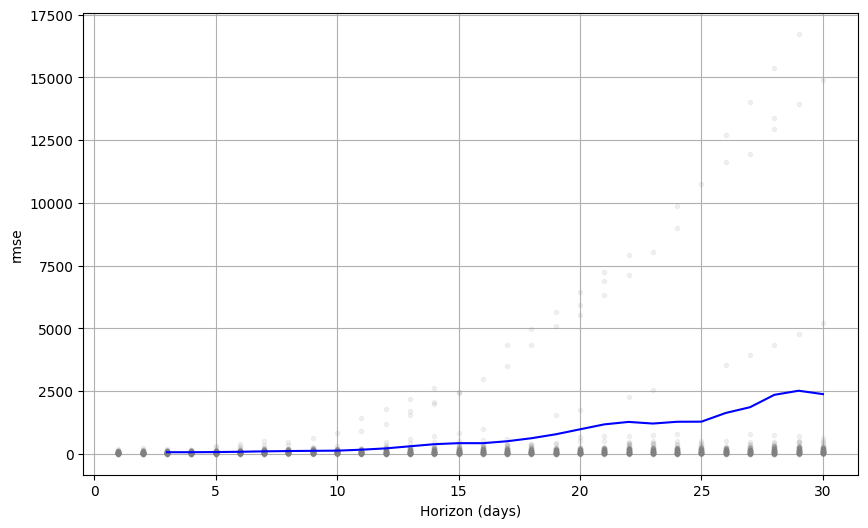

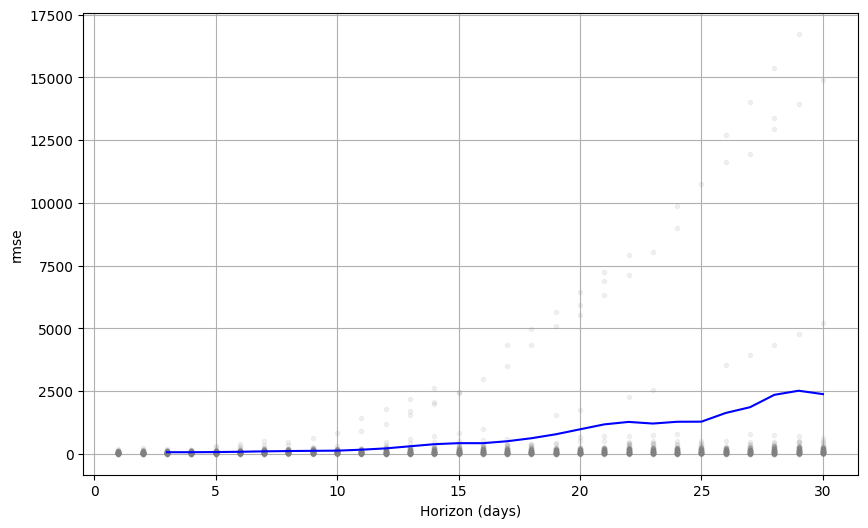

In [31]:
# VISUALIZATION:
from prophet.plot import plot_cross_validation_metric
plot_cross_validation_metric(df_cv, metric='rmse')

This means going for lesser days of future predictions would be a better idea.